In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [99]:
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [100]:
fake = pd.read_csv("fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [101]:
true = pd.read_csv("true.csv")
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [102]:
fake['class'] = 'fake'
fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [103]:
true['class'] = 'true'
true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [104]:
print(fake.shape)
print(true.shape)

(23481, 5)
(21417, 5)


In [105]:
data = pd.concat([fake,true], ignore_index=True)
print(data.shape)

(44898, 5)


In [106]:
data.tail()

,title,text,subject,date,class
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [107]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [108]:
data.duplicated().sum()

209

In [109]:
data.drop_duplicates(inplace=True)

In [110]:
data.shape

(44689, 5)

<Axes: >

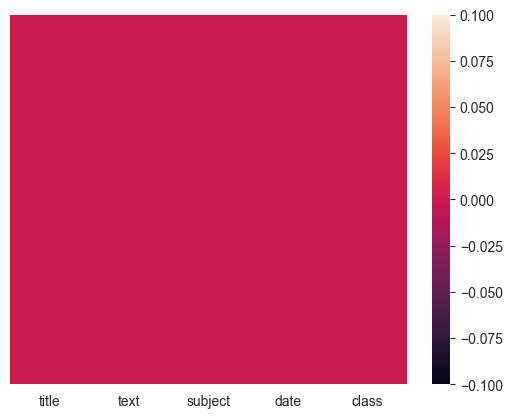

In [111]:
sns.heatmap(data.isnull(),annot=False,yticklabels=False)

In [112]:
data['date'] = pd.to_datetime(data['date'],format='mixed', dayfirst=True,errors='coerce')
data['date'].head()

0   2017-12-31
1   2017-12-31
2   2017-12-30
3   2017-12-29
4   2017-12-25
Name: date, dtype: datetime64[ns]

In [113]:
data['day'] = pd.to_datetime(data['date'],format='mixed', dayfirst=True,errors='coerce').dt.day
data['day'].head()

0    31.0
1    31.0
2    30.0
3    29.0
4    25.0
Name: day, dtype: float64

In [114]:
data.index = data['date']


In [115]:
data.isnull().sum()

title       0
text        0
subject     0
date       10
class       0
day        10
dtype: int64

In [116]:
data.head()


,title,text,subject,date,class,day
date,,,,,,
2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,fake,31.0
2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,fake,31.0
2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,fake,30.0
2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,fake,29.0
2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,fake,25.0


<Axes: xlabel='class'>

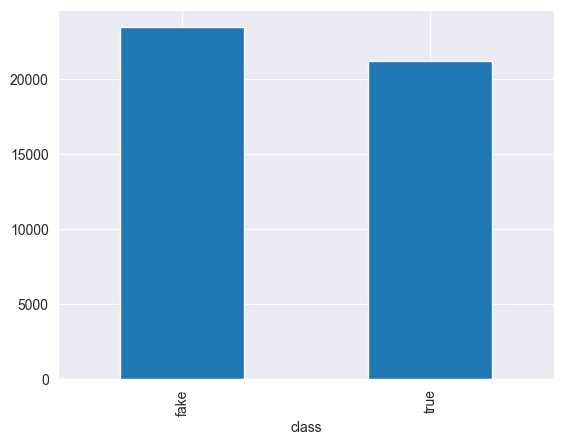

In [117]:
data["class"].value_counts().plot(kind="bar")


Add two new columns to your dataframe. The first column, "title_length", calculates the number of words in the "title" column using the lambda function. The second column, "text_length", does the same thing but for the "text" column. This will be helpful for analyzing the length of titles and texts in this dataset.

In [118]:
data["title_length"] = data["title"].apply(lambda title: len(title.split(" ")))
data["text_length"] = data["text"].apply(lambda text: len(text.split(" ")))

Generate descriptive statistics for the "title_length" and "text_length" columns. It provides useful information such as count, mean, standard deviation, minimum value, and quartiles. This summary gives us a quick overview of the distribution and basic statistics of the lengths of the titles and texts in the dataset.

In [119]:
data[["title_length", "text_length"]].describe()


,title_length,text_length
count,44689.000000,44689.000000
mean,12.667972,415.434335
std,4.175133,361.968943
min,1.000000,1.000000
25%,10.000000,208.000000
50%,12.000000,370.000000
75%,15.000000,525.000000
max,45.000000,8436.000000


Visualize the distribution of values of title length and text length.



<Axes: ylabel='Frequency'>

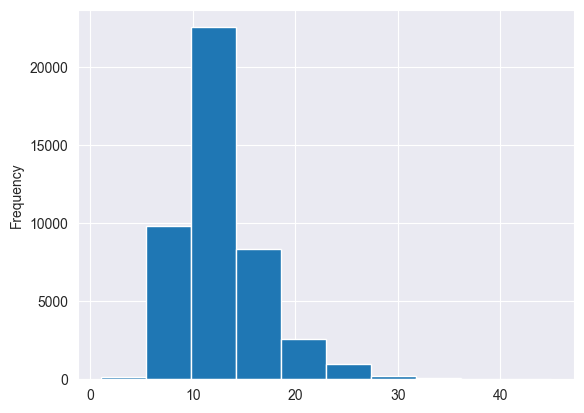

In [120]:
data["title_length"].plot(kind="hist")



<Axes: ylabel='Frequency'>

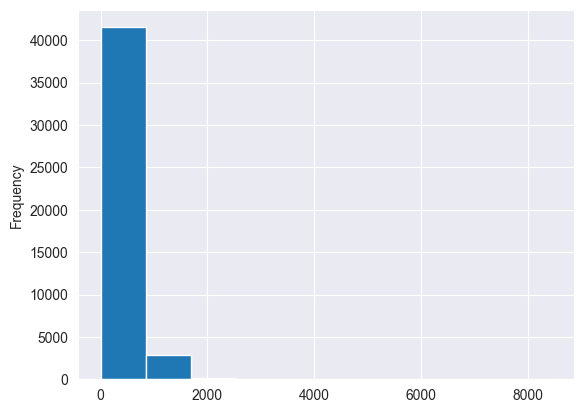

In [121]:
data["text_length"].plot(kind="hist")

Text Cleaning and Preprocessing:


Text cleaning

Tokenization
Lowercasing
Removing Stopwords
Removing Punctuation and Special Characters

In [122]:
import re  # Regular expressions
import nltk  # Natural language processing
nltk.download('vader_lexicon')  # Download VADER lexicon
from nltk.corpus import stopwords  # Stopwords
nltk.download('stopwords')  # Download stopwords corpus
# Get the stopwords for the language.
stpwrds = stopwords.words('english')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91916\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91916\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [123]:
# General transformation in the text
def transformation(df, mc,):
    
    df[mc] = df[mc].replace("\n"," ").replace("\t"," ")
    df[mc] = df[mc].str.lower()
    df[mc] = df[mc].apply(lambda x: re.sub('@[^\s]+', '', x))
    df[mc] = df[mc].apply(lambda x: re.sub(r'\B#\S+', '', x))
    df[mc] = df[mc].apply(lambda x: re.sub(r"http\S+", "", x))
    df[mc] = df[mc].apply(lambda x: ' '.join(re.findall(r'\w+', x)))
    df[mc] = df[mc].apply(lambda x: re.sub(r'\s+[b-zA-Z]\s+', ' ', x))
    df[mc] = df[mc].apply(lambda x: re.sub(r'\s+', ' ', x, flags=re.I))
    df[mc] = df[mc].apply(lambda x: ' '.join([word for word in x.split() if word not in stpwrds]))

    df['words'] = df[mc].apply(lambda x: re.findall(r'\w+', x))
    df['words_count'] = df.words.apply(len)
    df['length_count'] = df[mc].apply(len)

    return df['words']

In [124]:
df = transformation(data,'text')
df.head()

date
2017-12-31    [donald, trump, wish, americans, happy, new, y...
2017-12-31    [house, intelligence, committee, chairman, dev...
2017-12-30    [friday, revealed, former, milwaukee, sheriff,...
2017-12-29    [christmas, day, donald, trump, announced, wou...
2017-12-25    [pope, francis, used, annual, christmas, day, ...
Name: words, dtype: object

In [125]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA 

# Set the plotting style to 'darkgrid'.
sns.set_style('darkgrid')

# Create an instance of the SentimentIntensityAnalyzer for sentiment analysis.
sia = SIA()

# Get the stopwords for the Portuguese language.
stpwrds = stopwords.words('english')

# Define a custom color map for sentiment categories based on Kaggle palette.
custom_colors_map = {
    'Negative': '#6495ED',  # Cornflower Blue
    'Neutral': '#A9A9A9',  # Dark Gray
    'Positive': '#00CED1'  # Dark Turquoise
}

Sentiment Analsysis
The code performs sentiment analysis on the text data using the VADER model from the NLTK library. It calculates sentiment scores and classifies them into three categories: 'Negative', 'Positive', or 'Neutral'. The sentiment scores are stored in the 'sentiment_eval' column, and the corresponding classifications are stored in the 'class_sentiment' column.

In [126]:
from tqdm import tqdm  # Progress bars

def sentiment_classification(x: float):
    return 'Negative' if x < -0.25 else 'Positive' if x > 0.25 else 'Neutral'

data['sentiment_eval'] = [sia.polarity_scores(x)['compound'] for x in tqdm(data['text'])]

data['class_sentiment'] = data['sentiment_eval'].apply(sentiment_classification)

100%|██████████| 44689/44689 [05:12<00:00, 142.79it/s]


In [127]:
data.head()


,title,text,subject,date,class,day,title_length,text_length,words,words_count,length_count,sentiment_eval,class_sentiment
date,,,,,,,,,,,,,
2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,2017-12-31,fake,31.0,13,516,"[donald, trump, wish, americans, happy, new, y...",282,1830,0.9709,Positive
2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,fake,31.0,9,309,"[house, intelligence, committee, chairman, dev...",184,1379,0.6300,Positive
2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,2017-12-30,fake,30.0,16,600,"[friday, revealed, former, milwaukee, sheriff,...",342,2313,-0.9953,Negative
2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,2017-12-29,fake,29.0,15,475,"[christmas, day, donald, trump, announced, wou...",269,1827,0.4430,Positive
2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,2017-12-25,fake,25.0,12,434,"[pope, francis, used, annual, christmas, day, ...",212,1465,0.8940,Positive


In [128]:
sent = data.groupby(['subject','class'])['class_sentiment'].value_counts().reset_index()
sent.head()

,subject,class,class_sentiment,count
0,Government News,fake,Negative,702
1,Government News,fake,Positive,669
2,Government News,fake,Neutral,199
3,Middle-east,fake,Positive,367
4,Middle-east,fake,Negative,367


In [129]:
# Function to create a custom histogram.
def senti_plot(df, category: str):

    fig = px.histogram(
    df['class_sentiment'],
    y="class_sentiment",
    title=f'Sentiment Analysis from {category}',
    color='class_sentiment',
    color_discrete_map=custom_colors_map
    )

    # Customize the hover template to display the sentiment and count.
    fig.update_traces(hovertemplate='%{y}<br>Count: %{x}')

    # Update the layout with additional configurations.
    fig.update_layout(template='plotly_dark', title_x=0.5, yaxis_title='Sentiment', xaxis_title='Count', legend_title='Sentiment')

    # Display the figure.
    return fig

In [130]:
cat_data = data['subject'].unique().tolist()
cat_data

['News',
 'politics',
 'Government News',
 'left-news',
 'US_News',
 'Middle-east',
 'politicsNews',
 'worldnews']

In [131]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: nb-black 1.0.7 has a non-standard dependency specifier black>='19.3'; python_version >= "3.6". pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of nb-black or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [132]:
for category in cat_data:
    
    df = data[data['subject'] == category]
    
    display(senti_plot(df, category))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Positive',
              'marker': {'color': '#00CED1', 'pattern': {'shape': ''}},
              'name': 'Positive',
              'offsetgroup': 'Positive',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
                          'Positive'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Negative',
              'marker': {'color': '#6495ED', 'pattern': {'shape': ''}},
              'name': 'Negative',
              'offsetgroup': 'Negative',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Negative',
                          'Negative'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Neutral',
              'marker': {'color': '#A9A9A9', 'pattern': {'shape': ''}},
              'name': 'Neutral',
              'offsetgroup': 'Neutral',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral', 'Neutral'],
                         dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'Sentiment'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Sentiment Analysis from News', 'x': 0.5},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Count'}},
               'yaxis': {'anchor': 'x',
                         'categoryarray': [Neutral, Negative, Positive],
                         'categoryorder': 'array',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'Sentiment'}}}
})

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Positive',
              'marker': {'color': '#00CED1', 'pattern': {'shape': ''}},
              'name': 'Positive',
              'offsetgroup': 'Positive',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
                          'Positive'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Neutral',
              'marker': {'color': '#A9A9A9', 'pattern': {'shape': ''}},
              'name': 'Neutral',
              'offsetgroup': 'Neutral',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral', 'Neutral'],
                         dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Negative',
              'marker': {'color': '#6495ED', 'pattern': {'shape': ''}},
              'name': 'Negative',
              'offsetgroup': 'Negative',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Negative',
                          'Negative'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'Sentiment'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Sentiment Analysis from politics', 'x': 0.5},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Count'}},
               'yaxis': {'anchor': 'x',
                         'categoryarray': [Negative, Neutral, Positive],
                         'categoryorder': 'array',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'Sentiment'}}}
})

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Negative',
              'marker': {'color': '#6495ED', 'pattern': {'shape': ''}},
              'name': 'Negative',
              'offsetgroup': 'Negative',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Negative',
                          'Negative'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Positive',
              'marker': {'color': '#00CED1', 'pattern': {'shape': ''}},
              'name': 'Positive',
              'offsetgroup': 'Positive',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
                          'Positive'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Neutral',
              'marker': {'color': '#A9A9A9', 'pattern': {'shape': ''}},
              'name': 'Neutral',
              'offsetgroup': 'Neutral',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
              

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Negative',
              'marker': {'color': '#6495ED', 'pattern': {'shape': ''}},
              'name': 'Negative',
              'offsetgroup': 'Negative',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Negative',
                          'Negative'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Positive',
              'marker': {'color': '#00CED1', 'pattern': {'shape': ''}},
              'name': 'Positive',
              'offsetgroup': 'Positive',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
                          'Positive'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Neutral',
              'marker': {'color': '#A9A9A9', 'pattern': {'shape': ''}},
              'name': 'Neutral',
              'offsetgroup': 'Neutral',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral', 'Neutral'],
                         dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'Sentiment'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Sentiment Analysis from left-news', 'x': 0.5},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Count'}},
               'yaxis': {'anchor': 'x',
                         'categoryarray': [Neutral, Positive, Negative],
                         'categoryorder': 'array',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'Sentiment'}}}
})

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Negative',
              'marker': {'color': '#6495ED', 'pattern': {'shape': ''}},
              'name': 'Negative',
              'offsetgroup': 'Negative',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Negative',
                          'Negative'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Positive',
              'marker': {'color': '#00CED1', 'pattern': {'shape': ''}},
              'name': 'Positive',
              'offsetgroup': 'Positive',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
                          'Positive'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Neutral',
              'marker': {'color': '#A9A9A9', 'pattern': {'shape': ''}},
              'name': 'Neutral',
              'offsetgroup': 'Neutral',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'Sentiment'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Sentiment Analysis from US_News', 'x': 0.5},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Count'}},
               'yaxis': {'anchor': 'x',
                         'categoryarray': [Neutral, Positive, Negative],
                         'categoryorder': 'array',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'Sentiment'}}}
})

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Negative',
              'marker': {'color': '#6495ED', 'pattern': {'shape': ''}},
              'name': 'Negative',
              'offsetgroup': 'Negative',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Negative',
                          'Negative'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Positive',
              'marker': {'color': '#00CED1', 'pattern': {'shape': ''}},
              'name': 'Positive',
              'offsetgroup': 'Positive',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
                          'Positive'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Neutral',
              'marker': {'color': '#A9A9A9', 'pattern': {'shape': ''}},
              'name': 'Neutral',
              'offsetgroup': 'Neutral',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
                          'Neutral', 'Neutral'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'Sentiment'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Sentiment Analysis from Middle-east', 'x': 0.5},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Count'}},
               'yaxis': {'anchor': 'x',
                         'categoryarray': [Neutral, Positive, Negative],
                         'categoryorder': 'array',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'Sentiment'}}}
})

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Positive',
              'marker': {'color': '#00CED1', 'pattern': {'shape': ''}},
              'name': 'Positive',
              'offsetgroup': 'Positive',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
                          'Positive'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Negative',
              'marker': {'color': '#6495ED', 'pattern': {'shape': ''}},
              'name': 'Negative',
              'offsetgroup': 'Negative',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Negative',
                          'Negative'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Neutral',
              'marker': {'color': '#A9A9A9', 'pattern': {'shape': ''}},
              'name': 'Neutral',
              'offsetgroup': 'Neutral',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral', 'Neutral'],
                         dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'Sentiment'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Sentiment Analysis from politicsNews', 'x': 0.5},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Count'}},
               'yaxis': {'anchor': 'x',
                         'categoryarray': [Neutral, Negative, Positive],
                         'categoryorder': 'array',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'Sentiment'}}}
})

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Negative',
              'marker': {'color': '#6495ED', 'pattern': {'shape': ''}},
              'name': 'Negative',
              'offsetgroup': 'Negative',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Negative',
                          'Negative'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Positive',
              'marker': {'color': '#00CED1', 'pattern': {'shape': ''}},
              'name': 'Positive',
              'offsetgroup': 'Positive',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
                          'Positive'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'y',
              'hovertemplate': '%{y}<br>Count: %{x}',
              'legendgroup': 'Neutral',
              'marker': {'color': '#A9A9A9', 'pattern': {'shape': ''}},
              'name': 'Neutral',
              'offsetgroup': 'Neutral',
              'orientation': 'h',
              'showlegend': True,
              'type': 'histogram',
              'xaxis': 'x',
              'y': array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral', 'Neutral'],
                         dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'Sentiment'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Sentiment Analysis from worldnews', 'x': 0.5},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Count'}},
               'yaxis': {'anchor': 'x',
                         'categoryarray': [Neutral, Positive, Negative],
                         'categoryorder': 'array',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'Sentiment'}}}
})

In [133]:
def day_plot(df, type: str):
    # Group the data by 'day' and 'class_sentiment' columns and calculate the counts.
    combined_day = df.groupby(['day', 'class_sentiment']).size().reset_index(name='counts')

    # Pivot the data to reshape it with 'day' as the index, sentiment categories as columns, and counts as values.
    combined_day = combined_day.pivot(index='day',columns='class_sentiment',values='counts').reset_index().fillna(0)

    # Reorder the columns of the DataFrame.
    combined_day = combined_day[['day', 'Negative', 'Neutral', 'Positive']]

    # Create a stacked bar plot using Plotly Express.
    fig = px.bar(
        data_frame=combined_day,
        x='day',
        y=['Negative','Neutral','Positive'],
        title=f'Sentiment Analysis by day from {type}',
        barmode='stack',
        color_discrete_map=custom_colors_map
    )

    # Customize the hover template to display the count.
    fig.update_traces(hovertemplate='Count: %{y}')

    # Update the layout with additional configurations.
    fig.update_layout(template='plotly_dark', title_x=0.5, yaxis_title='Posts', xaxis_title='day', legend_title='Sentiment')

    # Update the trace names to title case.
    fig.for_each_trace(lambda t: t.update(name=t.name.title()))

    # Set the legend order as Positive, Neutral, Negative.
    fig.update_layout(legend=dict(traceorder='reversed'))

    # Display the plot.
    fig.show()

In [134]:
day_plot(data, 'subject')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Feature Selection for modelling

Feature selection is the process of choosing a subset of relevant features or variables from a larger set in order to build more efficient and effective machine learning models. The goal is to improve model performance, reduce overfitting, and enhance interpretability.

In [135]:
df = data
df.head()

,title,text,subject,date,class,day,title_length,text_length,words,words_count,length_count,sentiment_eval,class_sentiment
date,,,,,,,,,,,,,
2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,2017-12-31,fake,31.0,13,516,"[donald, trump, wish, americans, happy, new, y...",282,1830,0.9709,Positive
2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,fake,31.0,9,309,"[house, intelligence, committee, chairman, dev...",184,1379,0.6300,Positive
2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,2017-12-30,fake,30.0,16,600,"[friday, revealed, former, milwaukee, sheriff,...",342,2313,-0.9953,Negative
2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,2017-12-29,fake,29.0,15,475,"[christmas, day, donald, trump, announced, wou...",269,1827,0.4430,Positive
2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,2017-12-25,fake,25.0,12,434,"[pope, francis, used, annual, christmas, day, ...",212,1465,0.8940,Positive


In [136]:
df['class'] = df['class'].map({'true':0,'fake':1})
df['class'].value_counts()

class
1    23478
0    21211
Name: count, dtype: int64

In [137]:
y =df['class']


In [138]:
features = data.drop(["date","day","words","sentiment_eval","class_sentiment",],axis=1)
features.head()

,title,text,subject,class,title_length,text_length,words_count,length_count
date,,,,,,,,
2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,1,13,516,282,1830
2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,1,9,309,184,1379
2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,1,16,600,342,2313
2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,1,15,475,269,1827
2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,1,12,434,212,1465


In [139]:
features.duplicated().sum()


4

In [140]:
features.drop_duplicates(inplace=True)


In [141]:
features.shape


(44685, 8)

In [142]:
dummies = pd.get_dummies(features['subject'],dtype=int)
dummies.head()

,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews
date,,,,,,,,
2017-12-31,0,0,1,0,0,0,0,0
2017-12-31,0,0,1,0,0,0,0,0
2017-12-30,0,0,1,0,0,0,0,0
2017-12-29,0,0,1,0,0,0,0,0
2017-12-25,0,0,1,0,0,0,0,0


In [143]:
features = pd.concat([features,dummies],axis=1)
features.shape

(44685, 16)

In [144]:
features.drop("subject",axis=1,inplace=True)


In [145]:
features.head()


,title,text,class,title_length,text_length,words_count,length_count,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews
date,,,,,,,,,,,,,,,
2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,1,13,516,282,1830,0,0,1,0,0,0,0,0
2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,1,9,309,184,1379,0,0,1,0,0,0,0,0
2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,1,16,600,342,2313,0,0,1,0,0,0,0,0
2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,1,15,475,269,1827,0,0,1,0,0,0,0,0
2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,1,12,434,212,1465,0,0,1,0,0,0,0,0


Word Vectors

Word vectors, also known as word embeddings, are numerical representations of words in a continuous vector space. These representations capture semantic relationships between words, allowing algorithms to understand the contextual meaning of words.

In [146]:
# General transformation in the text
def preprocessing(mc):
    
    mc = mc.replace("\n"," ").replace("\t"," ")
    mc = mc.lower()
    mc = re.sub('@[^\s]+', '', mc)
    mc = re.sub(r'\B#\S+', '', mc)
    mc = re.sub(r"http\S+", "", mc)
    mc = ' '.join(re.findall(r'\w+', mc))
    mc = re.sub(r'\s+[b-zA-Z]\s+', ' ', mc)
    mc = re.sub(r'\s+', ' ', mc, flags=re.I)
    

    return mc

In [147]:
# Import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create CountVectorizer object
tdf_vectorizer = TfidfVectorizer(ngram_range=(1,3),stop_words='english',preprocessor=preprocessing,max_features=10000)

# Generate matrix of word vectors
tdf_vec = tdf_vectorizer.fit_transform(features['text'])

# Print the shape of bo
tdf_vec.shape

(44685, 10000)

In [148]:
# Assuming 'tdf_vec' is a sparse matrix and 'data' is your original DataFrame
# Convert 'tdf_vec' to a DataFrame
tdf_df = pd.DataFrame(tdf_vec.toarray(), columns=tdf_vectorizer.get_feature_names_out(), index=features.index)


In [149]:
y = features['class']

In [150]:
features = features.drop("class",axis=1)

In [151]:
merged = pd.concat([features,tdf_df],axis=1)
merged.head()

,title,text,title_length,text_length,words_count,length_count,Government News,Middle-east,News,US_News,...,zero,zika,zika virus,zimbabwe,zinke,zone,zones,zor,zuckerberg,zuma
date,,,,,,,,,,,,,,,,,,,,,
2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,13,516,282,1830,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,9,309,184,1379,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,16,600,342,2313,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,15,475,269,1827,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,12,434,212,1465,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
merged = merged.rename(columns={'politics': 'new_politics'})

In [153]:
merged = merged.loc[:, ~merged.columns.duplicated(keep='last')]

In [154]:
X = merged.drop(["title","text"],axis=1)


In [155]:
print(X.shape)
print(y.shape)

(44685, 10009)
(44685,)


LightGBM Classifier

LightGBM (Light Gradient Boosting Machine) is a gradient boosting framework that uses tree-Qbased learning algorithms. It is designed for distributed and efficient training of large datasets and has become popular in machine learning competitions due to its speed and performance. LightGBM is particularly well-suited for dealing with large datasets and handling categorical features efficiently.

In [156]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,random_state=42,test_size=0.3,stratify=y)

In [158]:
from sklearn.metrics import accuracy_score,log_loss
from lightgbm import LGBMClassifier


lgr = LGBMClassifier()

lgr.fit(X_train,y_train)

y_pred = lgr.predict(X_test)
y_pred_prob = lgr.predict_proba(X_test)

score =accuracy_score(y_test,y_pred)
loss = log_loss(y_test,y_pred_prob)

print("Accuracy score of LGR model is ",score)
print("Log Loss of LGR model is ",loss)

MemoryError: Unable to allocate 2.33 GiB for an array with shape (10009, 31279) and data type float64

In [159]:
from lightgbm import plot_importance as pi
pi(booster=lgr,max_num_features=20)

NotFittedError: No booster found. Need to call fit beforehand.

In [ ]:
from lightgbm import LGBMClassifier
import optuna

def objective_lgb(trial):
    """Define the objective function"""

    params = {
        'objective': trial.suggest_categorical('objective', ['binary']),
        #'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.01, 0.5),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 0.5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 0.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "random_state" : trial.suggest_categorical('random_state', [42]),
        #'num_leaves' : trial.suggest_int('num_leaves',2,6),
        #'eval_metric' : 'logloss'
    }


    model_lgb = LGBMClassifier(**params)
    model_lgb.fit(X_train, y_train)
    y_pred_prob = model_lgb.predict_proba(X_test)
    return log_loss(y_test,y_pred_prob)

In [ ]:
study_lgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.ERROR)
study_lgb.optimize(objective_lgb, n_trials=10,show_progress_bar=True)

In [ ]:
lgb = LGBMClassifier(**study_lgb.best_params)

lgb.fit(X_train, y_train)
y_pred = lgb.predict_proba(X_test)

logloss = log_loss(y_test,y_pred)
print("LGM Boost loss value",logloss)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lgb,X_test, y_test,cmap="Blues")